# 뗑컨 몸무게 예측 경진대회

## 데이터 EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotnine import *

In [2]:
df = pd.read_csv('C:/Users/Jaesu/Dacon-Basic/뗑컨-몸무게-예측/Data/train.csv')

In [3]:
df.head()

,id,Species,Island,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Body Mass (g)
0,0,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,50.0,15.3,220,MALE,8.30515,-25.19017,5550
1,1,Chinstrap penguin (Pygoscelis antarctica),Dream,No,49.5,19.0,200,MALE,9.63074,-24.34684,3800
2,2,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,45.1,14.4,210,FEMALE,8.51951,-27.01854,4400
3,3,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,44.5,14.7,214,FEMALE,8.20106,-26.16524,4850
4,4,Gentoo penguin (Pygoscelis papua),Biscoe,No,49.6,16.0,225,MALE,8.38324,-26.84272,5700


|변수   |세부사항   |
|:-:|:-:|
|id | 샘플 아이디|
|Species| 펭귄의 종을 나타내는 문자열|
|Island | 샘플들이 수집된 Palmer Station 근처 섬 이름|
|Clutch Completion | 관찰된 펭귄 둥지의 알이 2개인 경우 Full Clutch이며 Yes로 표기|
|Culmen Length (mm) | 펭귄 옆모습 기준 부리의 가로 길이|
|Culmen Depth (mm) | 펭귄 옆모습 기준 부리의 세로 길이|
|Flipper Length (mm) |펭귄의 팔(날개) 길이|
|Sex | 펭귄의 성별|
|Delta 15 N (o/oo)  | 토양에 따라 변화하는 안정 동위원소 15N:14N의 비율|
|Delta 13 C (o/oo) | 먹이에 따라 변화하는 안정 동위원소 13C:12C의 비율|
|Body Mass (g)| 펭귄의 몸무게를 나타내는 숫자 (g)|

`-` 범주형 변수 4개, 양적 변수 6개이다

In [7]:
df.describe().round(2)

,id,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Delta 15 N (o/oo),Delta 13 C (o/oo),Body Mass (g)
count,114.00,114.00,114.00,114.00,111.00,111.00,114.00
mean,56.50,44.61,17.01,203.05,8.74,-25.72,4327.85
std,33.05,5.32,1.94,14.65,0.57,0.86,781.77
min,0.00,33.50,13.20,174.00,7.63,-27.02,2700.00
25%,28.25,40.33,15.22,190.00,8.27,-26.43,3675.00
50%,56.50,45.20,17.25,199.00,8.63,-25.96,4250.00
75%,84.75,49.08,18.60,216.00,9.26,-25.01,4850.00
max,113.00,55.10,21.10,231.00,10.03,-24.10,6300.00


In [16]:
df.shape ## 똉컨 114마리에 대한 10가지의 정보

(114, 11)

In [11]:
df.isnull().sum()

id                     0
Species                0
Island                 0
Clutch Completion      0
Culmen Length (mm)     0
Culmen Depth (mm)      0
Flipper Length (mm)    0
Sex                    3
Delta 15 N (o/oo)      3
Delta 13 C (o/oo)      3
Body Mass (g)          0
dtype: int64

`-` Sex, Delta 15 N, Delta 13 C 컬럼에 결측치가 3개씩 존재한다

In [5]:
def check_missing_col(dataframe):
    missing_col = []
    counted_missing_col = 0
    for i, col in enumerate(dataframe.columns):
        missing_values = sum(dataframe[col].isna())
        is_missing = True if missing_values >= 1 else False
        if is_missing:
            counted_missing_col += 1
            print(f'결측치가 있는 컬럼은: {col}입니다')
            print(f'해당 컬럼에 총 {missing_values}개의 결측치가 존재합니다.')
            missing_col.append([col, dataframe[col].dtype])
    if counted_missing_col == 0:
        print('결측치가 존재하지 않습니다')
    return missing_col

missing_col = check_missing_col(df)

결측치가 있는 컬럼은: Sex입니다
해당 컬럼에 총 3개의 결측치가 존재합니다.
결측치가 있는 컬럼은: Delta 15 N (o/oo)입니다
해당 컬럼에 총 3개의 결측치가 존재합니다.
결측치가 있는 컬럼은: Delta 13 C (o/oo)입니다
해당 컬럼에 총 3개의 결측치가 존재합니다.


In [6]:
missing_col

[['Sex', dtype('O')],
 ['Delta 15 N (o/oo)', dtype('float64')],
 ['Delta 13 C (o/oo)', dtype('float64')]]

In [7]:
df.drop('id', axis = 1, inplace = True) ## id는 필요없으니 제거 

In [8]:
## 결측치가 있는 row들을 확인
df[df.isna().sum(axis = 1) > 0]

,Species,Island,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Body Mass (g)
6,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,42.0,20.2,190,NaN,9.13362,-25.09368,4250
8,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,34.1,18.1,193,NaN,NaN,NaN,3475
18,Adelie Penguin (Pygoscelis adeliae),Dream,No,39.8,19.1,184,MALE,NaN,NaN,4650
70,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,46.2,14.4,214,NaN,8.24253,-26.81540,4650
109,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,36.6,17.8,185,FEMALE,NaN,NaN,3700


`-` 결측치가 카테고리이면 행을 삭제하고 수치형이면 평균값을 넣어주자

In [9]:
# 결측치를 처리하는 함수 
def handle_na(data, missing_col):
    temp = data.copy()
    for col, dtype in missing_col:
        if dtype == 'O':
            # 카테고리형 feature가 결측치인 경우 해당 행들을 삭제
            temp = temp.dropna(subset=[col])
        elif dtype == int or dtype == float:
            # 수치형 feature가 결측치인 경우 평균값을 채움
            temp.loc[:,col] = temp[col].fillna(temp[col].mean())
    return temp

In [10]:
df = handle_na(df, missing_col)

In [11]:
# 결측치 처리가 잘 되었는지 확인
missing_col = check_missing_col(df) 

결측치가 존재하지 않습니다


In [12]:
df.rename(columns = {'Clutch Completion':'Full_Clutch', 'Culmen Length (mm)':'Culmen_Length', 
                     'Culmen Depth (mm)':'Culmen_Depth', 'Flipper Length (mm)':'Flipper_Length',
                     'Delta 15 N (o/oo)':'DeltaN', 'Delta 13 C (o/oo)':'DeltaC', 'Body Mass (g)':'Body_Mass'}, inplace = True) ## 열 이름 변경

`-` 분석의 편의를 위해 수치형 feature와 카테고리형 feature를 분리

In [13]:
# 전체의 데이터 타입을 확인
df.dtypes

Species            object
Island             object
Full_Clutch        object
Culmen_Length     float64
Culmen_Depth      float64
Flipper_Length      int64
Sex                object
DeltaN            float64
DeltaC            float64
Body_Mass           int64
dtype: object

In [14]:
numeric_feature = df.columns[(df.dtypes == np.int64)| (df.dtypes == float)]
categorical_feature = df.columns[df.dtypes == 'O']

print('수치형 데이터는 다음과 같습니다. \n', list(numeric_feature))
print('카테고리형 데이터는 다음과 같습니다. \n', list(categorical_feature))

수치형 데이터는 다음과 같습니다. 
 ['Culmen_Length', 'Culmen_Depth', 'Flipper_Length', 'DeltaN', 'DeltaC', 'Body_Mass']
카테고리형 데이터는 다음과 같습니다. 
 ['Species', 'Island', 'Full_Clutch', 'Sex']


## 데이터 EDA

### 범주형 변수

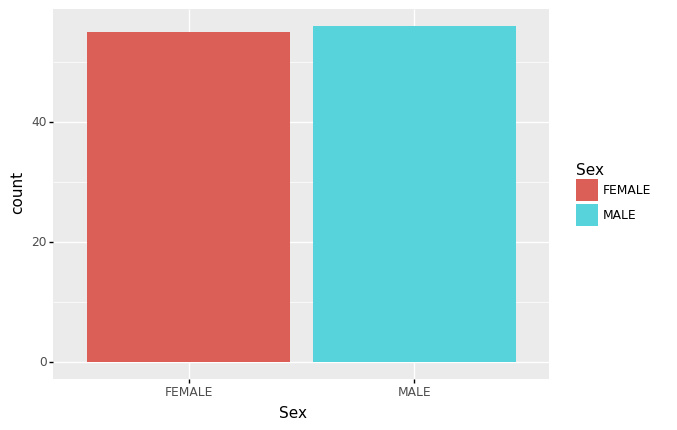

<ggplot: (117287430494)>

In [15]:
ggplot(df) + geom_bar(aes(x = 'Sex', fill = 'Sex'), stat = 'count')

`-` 성별 비율은 비슷하다

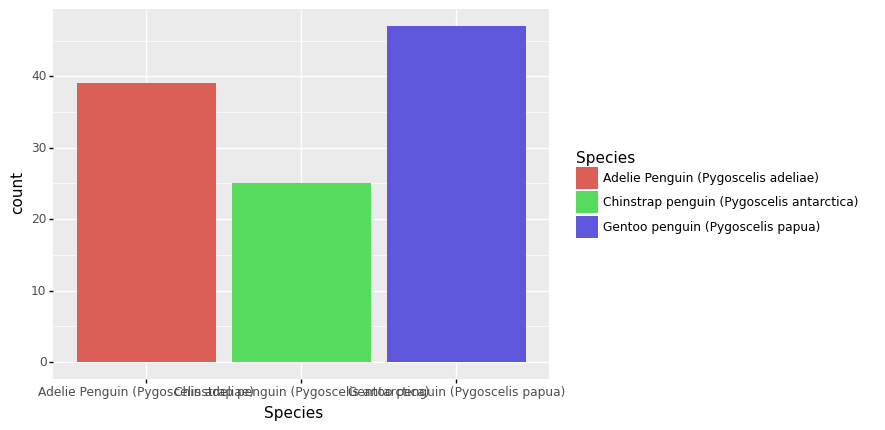

<ggplot: (117276475606)>

In [16]:
ggplot(df) + geom_bar(aes(x = 'Species', fill = 'Species'), stat = 'count')

`-` Gentoo 종이 가장 많다

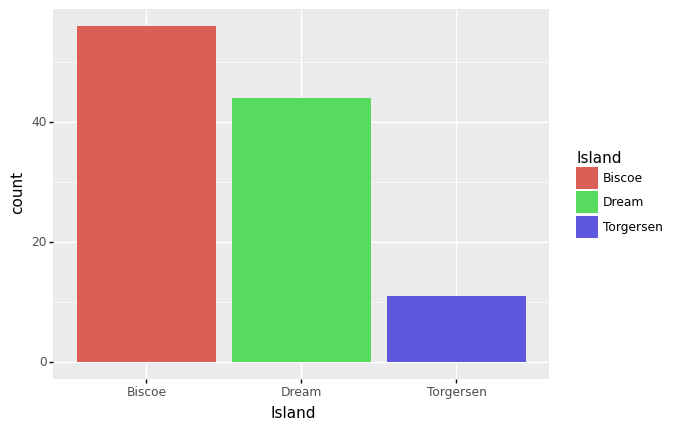

<ggplot: (117276591249)>

In [17]:
ggplot(df) + geom_bar(aes(x = 'Island', fill = 'Island'), stat = 'count')

`-` Biscore가 가장 많다

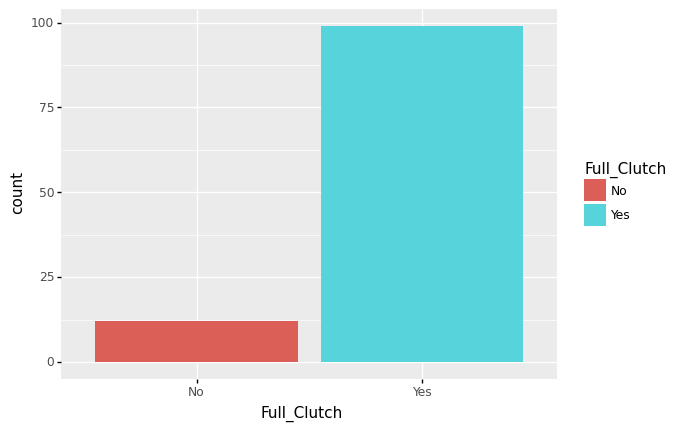

<ggplot: (117287944533)>

In [18]:
ggplot(df) + geom_bar(aes(x = 'Full_Clutch', fill = 'Full_Clutch'), stat = 'count')

`-` 대부분이 Full_Clutch 상태이다

`-` data imbalance가 심하다

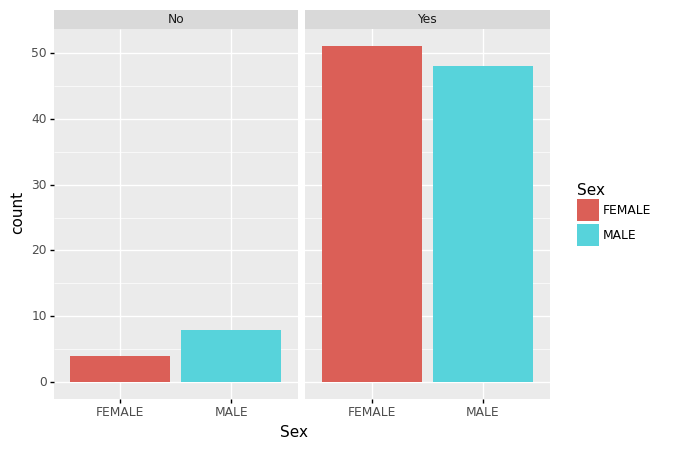

<ggplot: (117276510814)>

In [19]:
ggplot(df)\
+ geom_bar(aes(x = 'Sex', fill = 'Sex'), stat = 'count')\
+ facet_wrap('Full_Clutch')

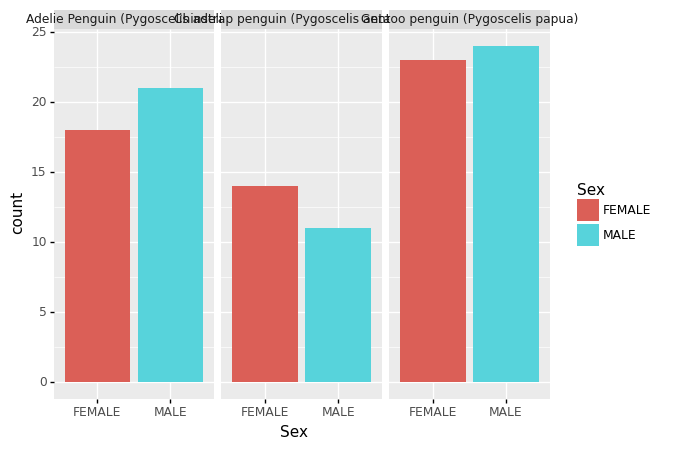

<ggplot: (117276599429)>

In [20]:
ggplot(df)\
+ geom_bar(aes(x = 'Sex', fill = 'Sex'), stat = 'count')\
+ facet_wrap('Species') 

### 양적 변수

In [21]:
corr_df = df.loc[:, numeric_feature] 
corr_matrix = corr_df.corr(method = 'pearson') # 상관관계 행렬

<AxesSubplot:>

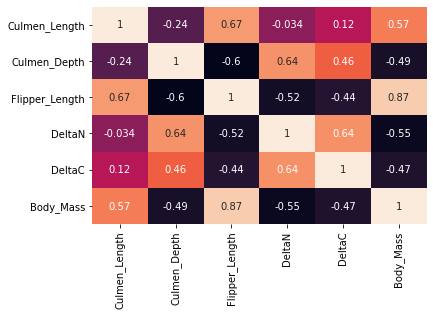

In [22]:
sns.heatmap(corr_matrix, annot = True, cbar = False)

`-` 일단 몸무게와 다른 양적 변수들 사이의 상관계수는 꽤 높은편이다

`-` 특히 펭귄의 팔(날개) 길이와 몸무게는 강한 양의 상관관계를 띄고있다

`-` 변수들 간의 상관계수가 높은 편이다

In [23]:
var = ['Culmen_Length', 'Culmen_Depth', 'Flipper_Length', 'DeltaN', 'DeltaC', 'Body_Mass'] ## 양적변수

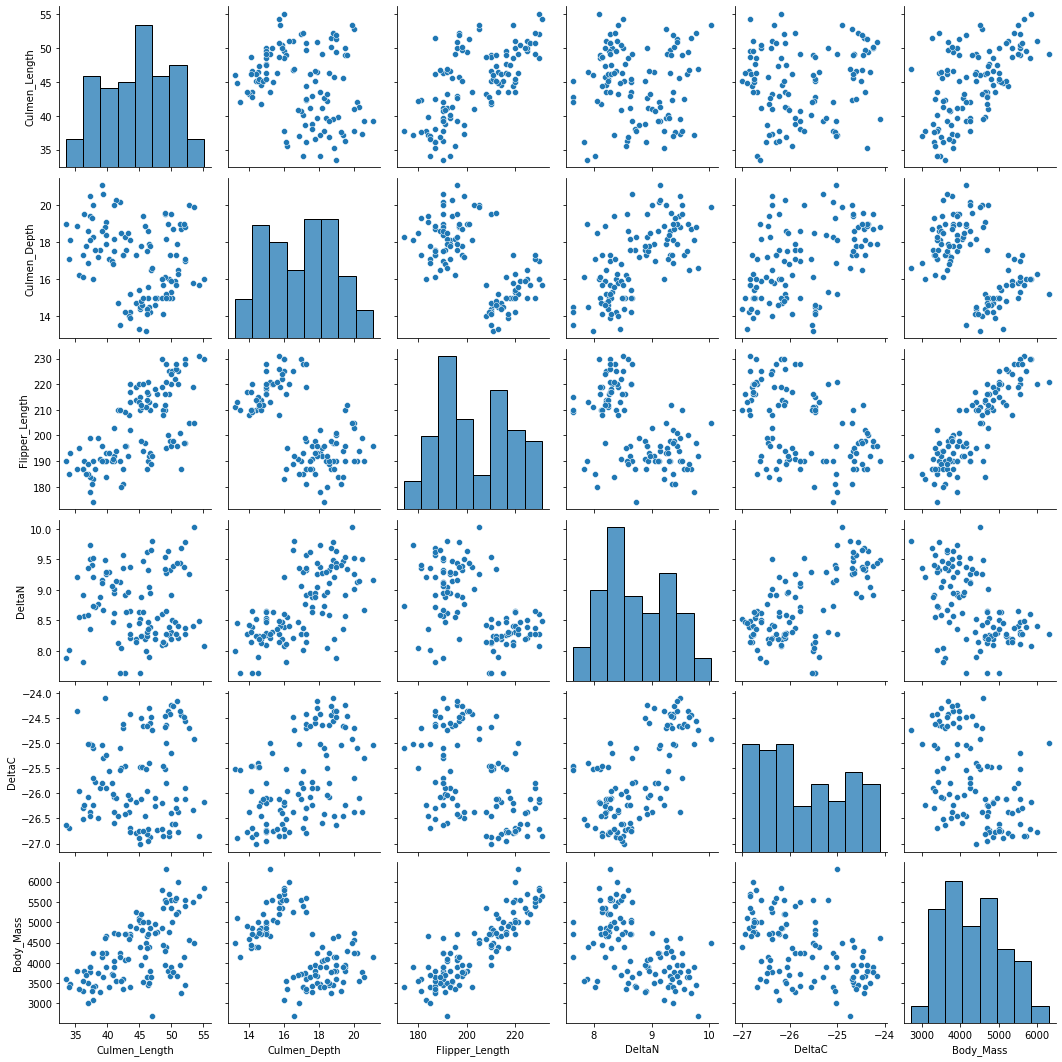

In [67]:
sns.pairplot(df, vars = var)

`-` 그룹화 되어있는 것 같다

`-` 어떤 변수에 의해 그룹화 된 것일까?

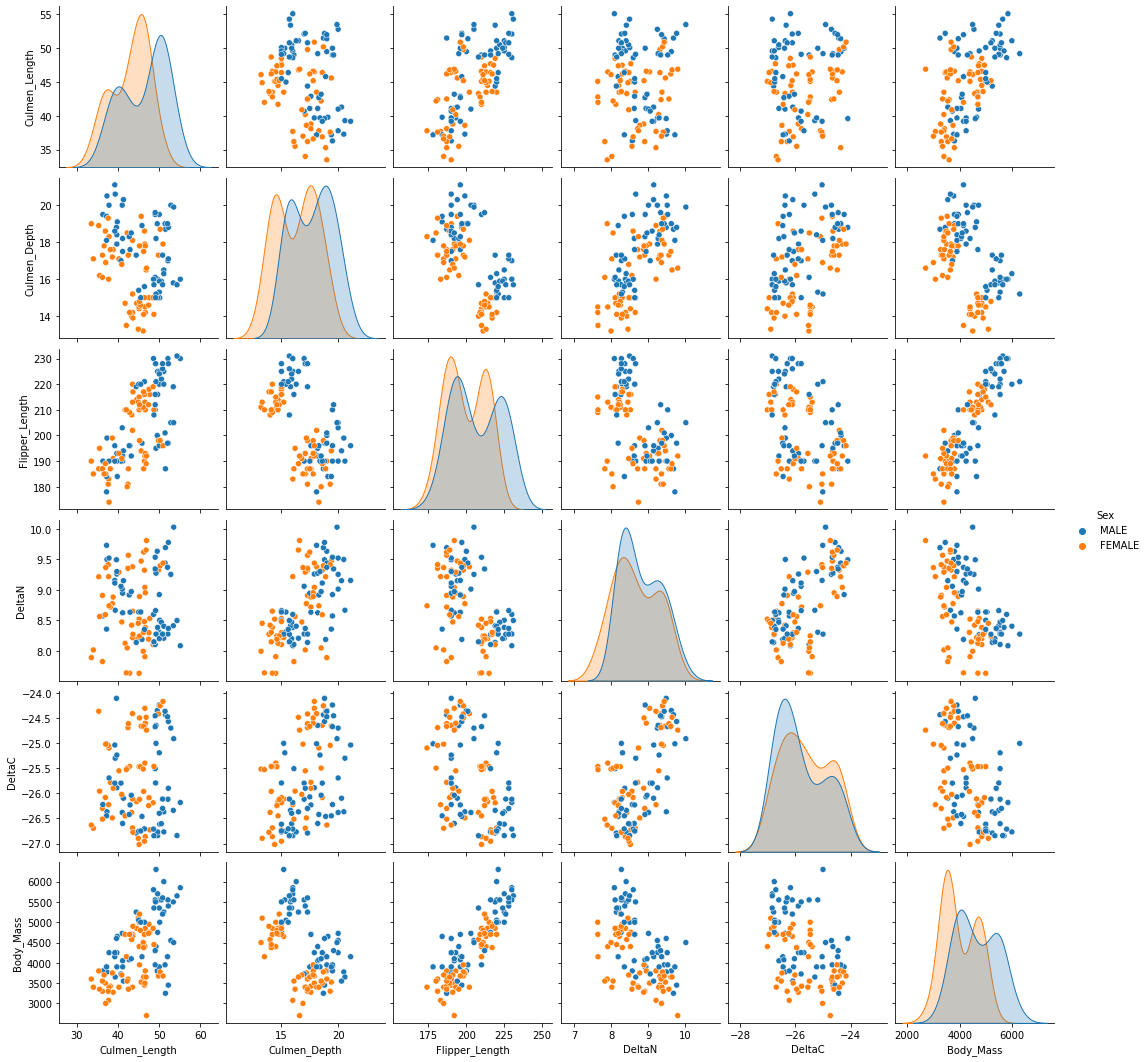

In [69]:
sns.pairplot(df, hue = 'Sex', vars = var)

`-` 수컷이 암컷보다 평균적으로 몸무게가 많이 나간다

`-` 그런데 kde를 보면 쌍봉분포로 보인다

`-` 즉 성별만으로 그룹화된 것을 설명하지 못한다는 것

`-` 종에 따라 나눈 plot을 아래와 같다

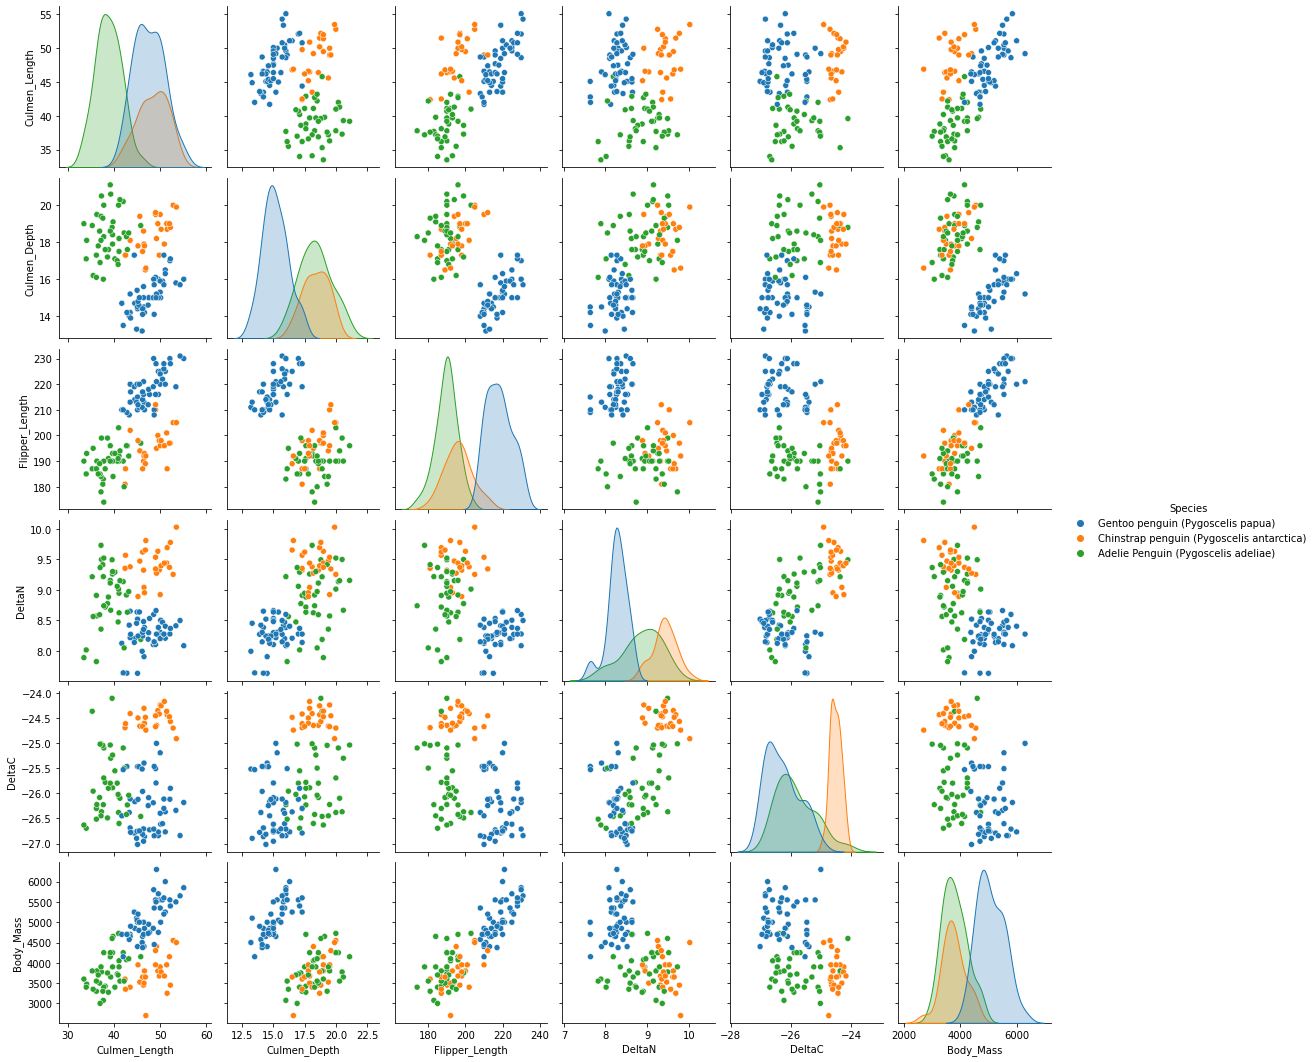

In [68]:
sns.pairplot(df, hue = 'Species', vars = var)

`-` 종에 의해 그룹화되어 있다

`-` Gentoo종이 몸무게가 평균적으로 많이 나간다

`-` 종에 따라 나눠보니 동위원소와 몸무게 사이에 상관관계는 없어보인다(그룹화는 되어있다)

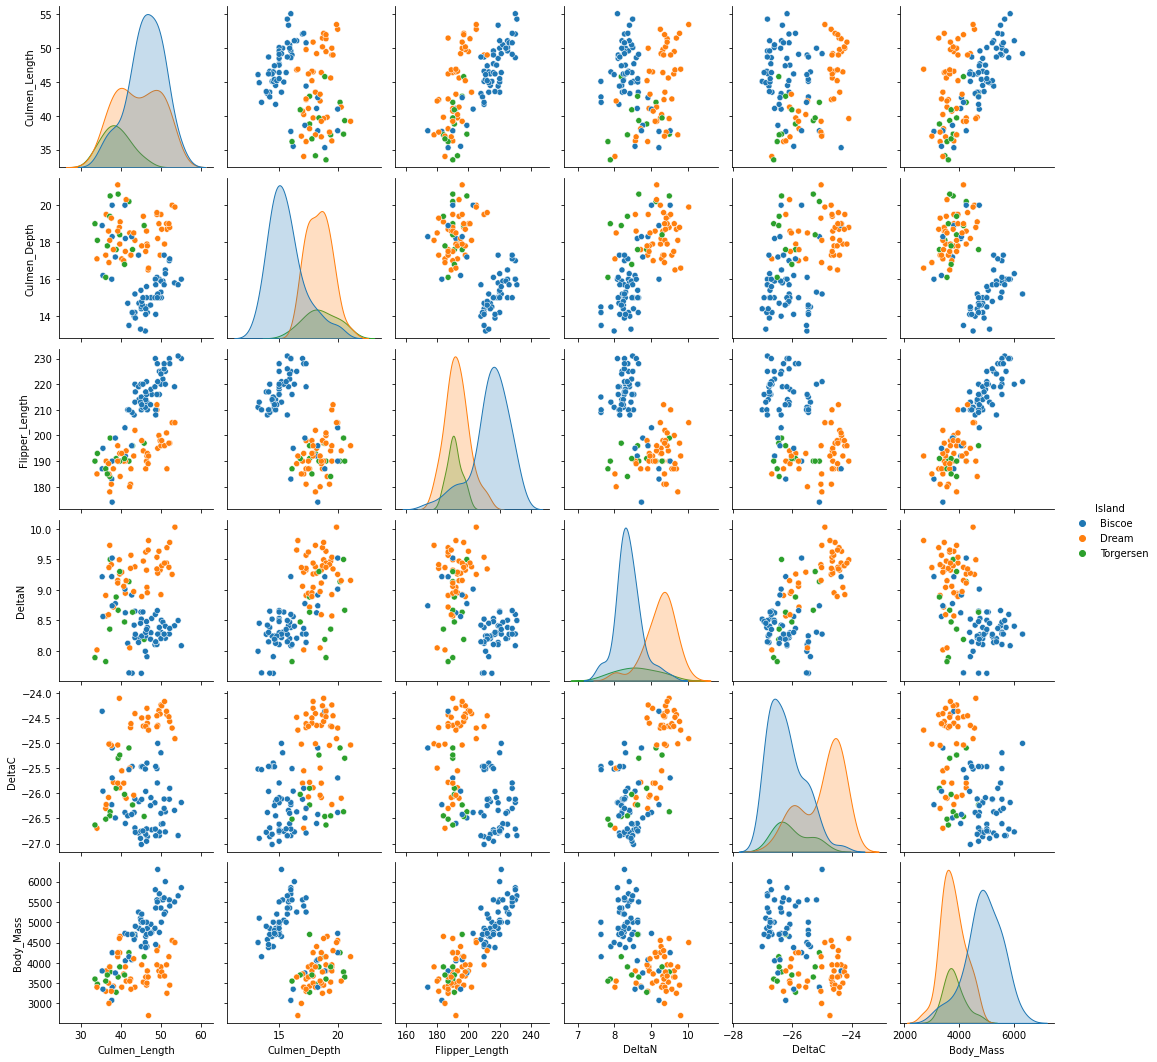

In [70]:
sns.pairplot(df, hue = 'Island', vars = var)

In [79]:
table = df.groupby(['Species', 'Island']).size().reset_index(name = 'cnt').pivot(index = 'Species', columns = 'Island', values = 'cnt')
table

Island,Biscoe,Dream,Torgersen
Species,,,
Adelie Penguin (Pygoscelis adeliae),9.0,19.0,13.0
Chinstrap penguin (Pygoscelis antarctica),NaN,25.0,NaN
Gentoo penguin (Pygoscelis papua),48.0,NaN,NaN


`-` Island(샘플들이 수집된 Palmer Station 근처 섬 이름)에 대해서도 그룹화가 되어있다

`-` 그런데 이는 Island변수 자체적인 이유라기보다는 Species 때문인것 같다 

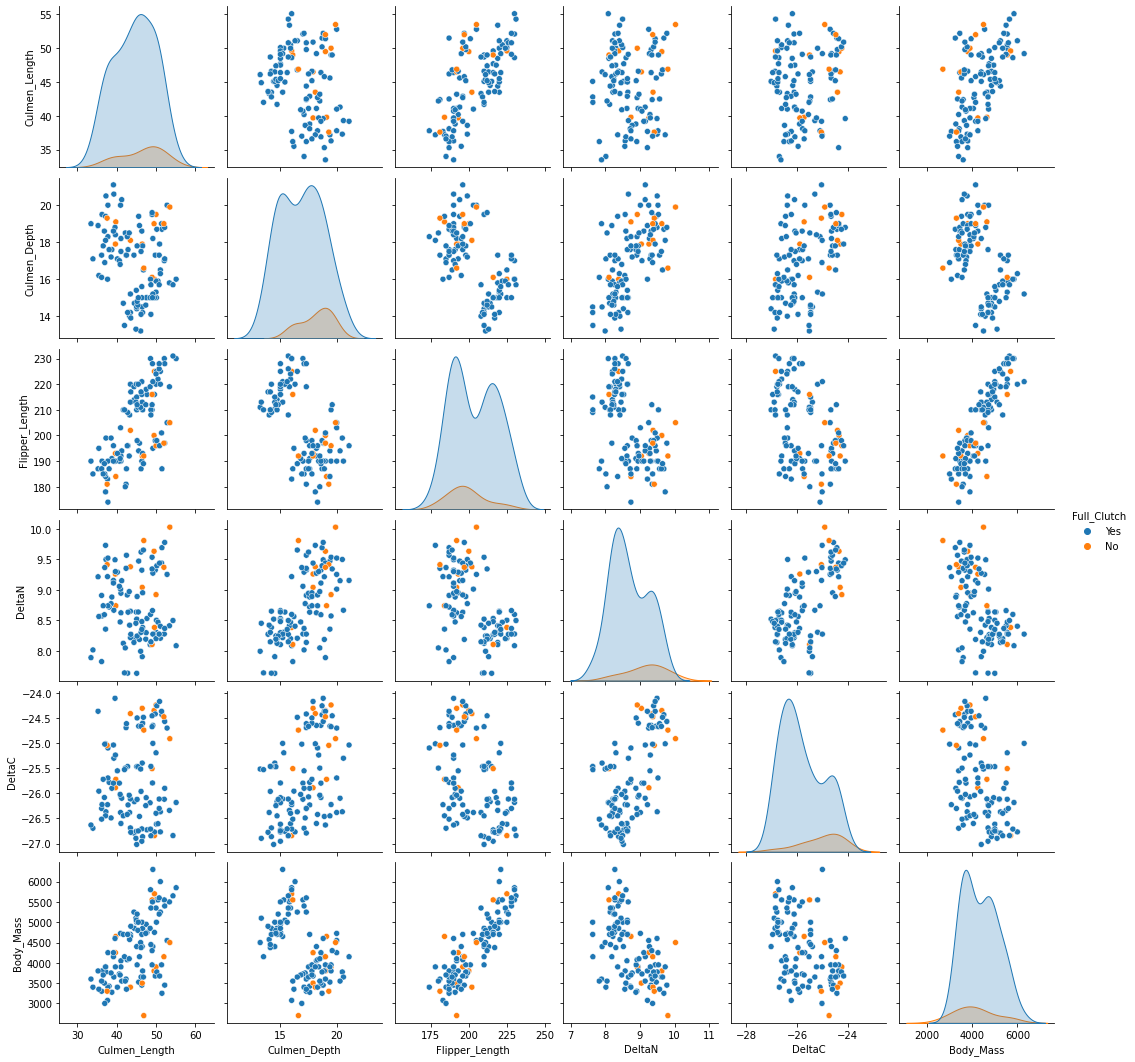

In [24]:
sns.pairplot(df, hue = 'Full_Clutch', vars = var)

`-` Full_Clutch feature는 무의미해보임